CONTORNOS E CONTAGEM DE OBJETOS

Importando as bibliotecas necessarias para o código funcionar

In [212]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

Conversão para escala cinza

In [213]:
image = cv2.imread('../ATIVIDADE MOEDAS/coins-fundo.png')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

Mostrando a imagem em escala de cinza ao lado da imagem original para comparação

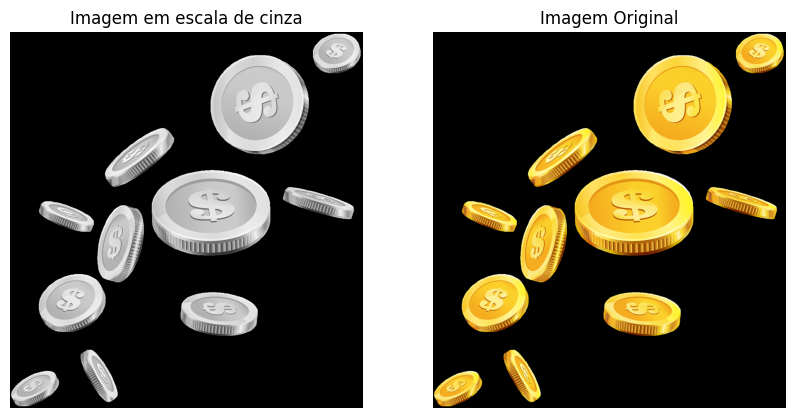

In [214]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Imagem Original")
plt.axis('off')

plt.subplot(1, 2, 1)
plt.imshow(image_gray, cmap='gray')
plt.title("Imagem em escala de cinza")
plt.axis('off')

plt.show()

Binarização com Limiar de Otsu, a imagem em escala de cinza foi binarizada utilizando o método de Otsu, que determina automaticamente um limiar adequado para separar os objetos do fundo. Essa técnica melhorou a segmentação das moedas na imagem, facilitando a detecção de contornos

In [215]:
_, binary_image = cv2.threshold(image_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

Utilizando filtro de abertura para a função len conseguir contar os contornos somente das moedas, descartando pequenos ruidos

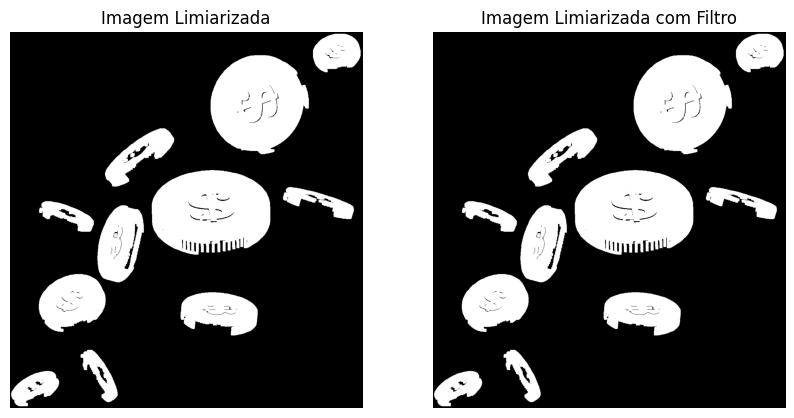

In [216]:
kernel = np.ones((9, 9), np.uint8)
binary_image = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)
imagem_bin_filtro = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Imagem Limiarizada')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(imagem_bin_filtro, cmap='gray')
plt.title('Imagem Limiarizada com Filtro')
plt.axis('off')
plt.show()

Colocando a imagem em escala de cinza ao lado da imagem binarizada em Otsu para comparação

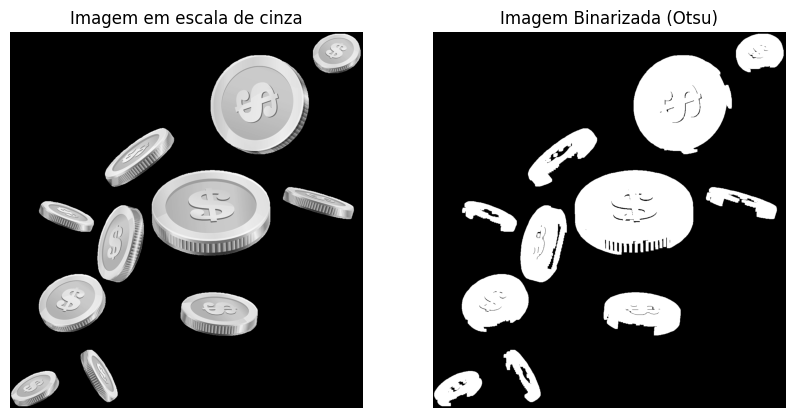

In [217]:
plt.figure(figsize=(10, 5))

# Imagem original em tons de cinza
plt.subplot(1, 2, 1)
plt.imshow(image_gray, cmap='gray')
plt.title("Imagem em escala de cinza")
plt.axis('off')

# Imagem binarizada
plt.subplot(1, 2, 2)
plt.imshow(binary_image, cmap='gray')
plt.title("Imagem Binarizada (Otsu)")
plt.axis('off')

plt.show()

Utilizando a detecção de contornos, os contornos dos objetos foram extraídos utilizando a função cv2.findContours. Os contornos foram desenhados sobre a imagem original para visualizar melhor a detecção dos objetos.

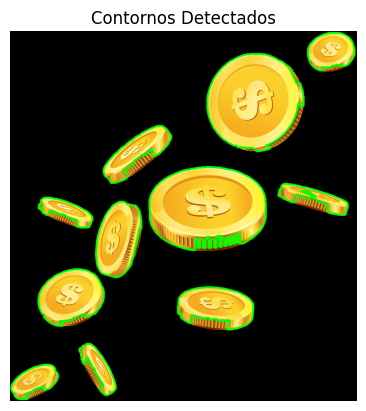

In [218]:
contours, _ = cv2.findContours(imagem_bin_filtro, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
image_with_contours = image.copy()
cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), 5) 


plt.imshow(cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB))
plt.title("Contornos Detectados")
plt.axis('off')
plt.show()


Fazendo a contagem das moedas, utilizando o len(contours)

In [219]:
num_objects = len(contours)

Colocando a imagem binarizada ao lado da imagem original, com o resultado do total de moedas encontradas.

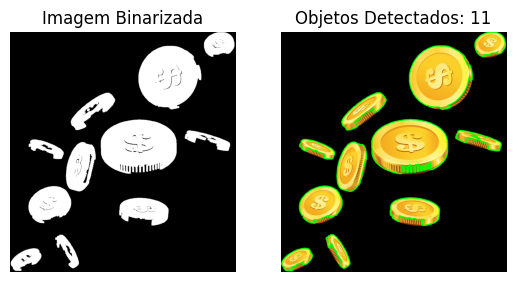

In [220]:
plt.subplot(1, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title("Imagem Binarizada")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB))
plt.title(f"Objetos Detectados: {num_objects}")
plt.axis('off')
plt.show()

Copiei as perguntas para ficar mais organizado.

1. Qual a função da limiarização automática em uma imagem?

A limiarização automática transforma uma imagem em tons de cinza em uma binária, separando fundo e objeto de interesse sem precisar definir um limiar manualmente. Algoritmos como Otsu e Limiarização Adaptativa são usados para isso.

2. Qual a diferença entre limiarização simples e limiarização por Otsu?

O ChatGPT disse:
A limiarização simples usa um valor fixo de limiar para binarizar a imagem, definido manualmente ou empiricamente. Já a limiarização por Otsu calcula automaticamente o melhor limiar, minimizando a variância dentro das classes (fundo e objeto), tornando-a mais eficaz para imagens com histograma bimodal.

3. Qual é o papel da função cv2.findContours() no processo de segmentação?

A função cv2.findContours() no OpenCV detecta contornos em uma imagem binária, identificando os limites dos objetos. Ela retorna uma lista de contornos e uma hierarquia que descreve as relações entre eles. Essa função é crucial para segmentação, permitindo separar objetos, contar regiões ou extrair formas. É comumente usada após a binarização da imagem e antes de análises ou visualizações.

4. Qual foi o número de objetos detectados na imagem?

Foram encontrados 100 objetos na imagem, mas após a aplicação do filtro de abertura, o número desceu para 11, que é o valor total de moedas que tem na imagem.

5. Quais são as vantagens da segmentação por cor no espaço de cores HSV?

A segmentação por cor no espaço HSV é eficiente porque separa cor, saturação e brilho, tornando-a robusta a variações de iluminação e facilitando a definição de intervalos de cores, é bastante usada para detecção e rastreamento de objetos, sendo mais intuitiva e menos sensível a mudanças de luz comparada a outros espaços de cores, como o RGB.